# Employee Absenteeism Project

In [2]:
pwd

'C:\\Users\\Ranjith P\\Desktop\\Employees'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import chi2_contingency

# Importing Dataset

In [4]:
emp=pd.read_excel("Absenteeism_at_work_Project.xls")

In [5]:
emp.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
emp.describe(include="all")

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [7]:
emp.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [8]:
emp=round(emp,0)

In [9]:
emp['ID']=emp['ID'].astype(object)
emp['Reason for absence']=emp['Reason for absence'].astype(object)
emp['Day of the week']=emp['Day of the week'].astype(object)
emp['Seasons']=emp['Seasons'].astype(object)
emp['Education']=emp['Education'].astype(object)
emp['Son']=emp['Son'].astype(object)
emp['Social drinker']=emp['Social drinker'].astype(object)
emp['Social smoker']=emp['Social smoker'].astype(object)
emp['Pet']=emp['Pet'].astype(object)

In [10]:
emp.dtypes

ID                                  object
Reason for absence                  object
Month of absence                   float64
Day of the week                     object
Seasons                             object
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                           object
Son                                 object
Social drinker                      object
Social smoker                       object
Pet                                 object
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002341F3185C0>,
      dtype=object)

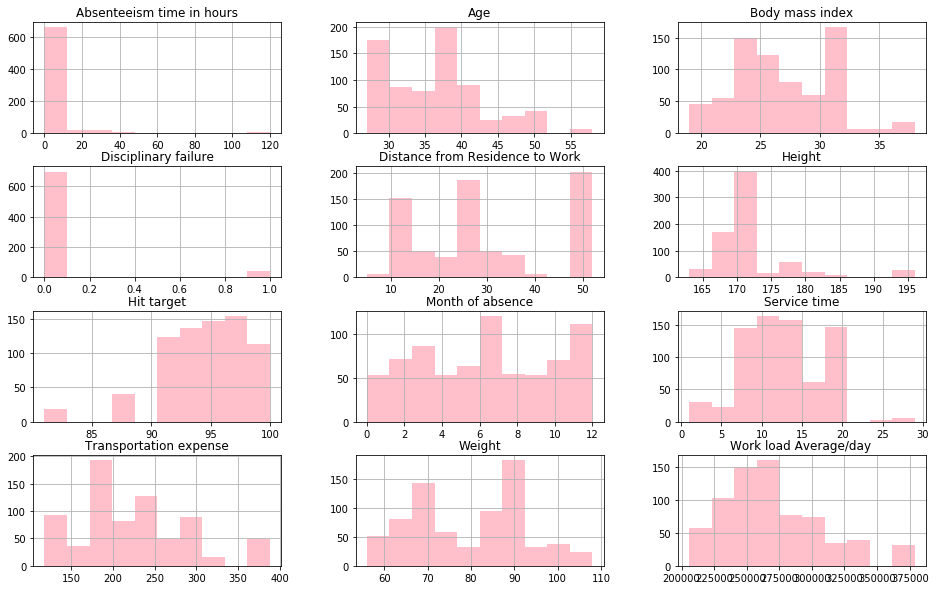

In [11]:
#Data Visualizations:
plt.rcParams["figure.figsize"] = [16,9]
emp.hist(figsize = (16,10),color="pink")

In [12]:
emp.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [13]:
emp = emp.loc[emp['Absenteeism time in hours']!= 0,:]

In [14]:
continuous_vars = ['Transportation expense','Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',
                   'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure', 
                    'Education', 'Social drinker','Social smoker', 'Pet', 'Son']

# Missing Value Analysis & Treatment

In [15]:
#Checking Missing value:

mv=pd.DataFrame(emp.isnull().sum())

mv

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [16]:
# Droping observation in which "Absenteeism time in hours" has missing value
emp1=emp.dropna()
print(emp.shape)
print(emp1.shape)

(704, 21)
(605, 21)


# Exploratory Data Analysis

In [17]:
emp1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [18]:
def relationship(a,b):
    da = emp1.groupby(a)[b].sum()
    da = da.reset_index()
    da[b] = da[b]*100/sum(emp1[b])
    da = da.sort_values(by=['Absenteeism time in hours'])
    print(da)
    return da.plot.barh(x=a,y=b)

    Reason for absence  Absenteeism time in hours
16                16.0                   0.133809
3                  3.0                   0.178412
4                  4.0                   0.200714
15                15.0                   0.356824
5                  5.0                   0.423729
22                24.0                   0.535236
2                  2.0                   0.535236
8                  8.0                   0.535236
19                21.0                   0.602141
23                25.0                   2.363961
0                  0.0                   2.676182
14                14.0                   2.765388
25                27.0                   3.122212
7                  7.0                   3.345227
9                  9.0                   3.389831
6                  6.0                   3.456735
11                11.0                   3.858162
17                18.0                   4.058876
1                  1.0                   4.058876


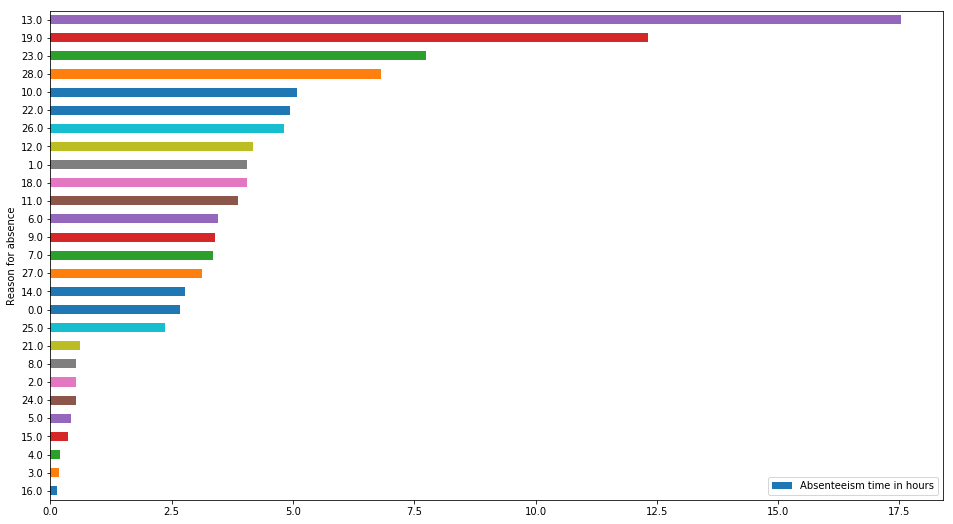

In [19]:
relationship('Reason for absence','Absenteeism time in hours')

    Month of absence  Absenteeism time in hours
8                9.0                   3.969670
0                1.0                   4.103479
7                8.0                   5.084746
11              12.0                   5.129349
1                2.0                   6.199822
9               10.0                   6.534344
4                5.0                   8.742194
5                6.0                   8.809099
10              11.0                   8.853702
3                4.0                  10.749331
6                7.0                  15.834077
2                3.0                  15.990187


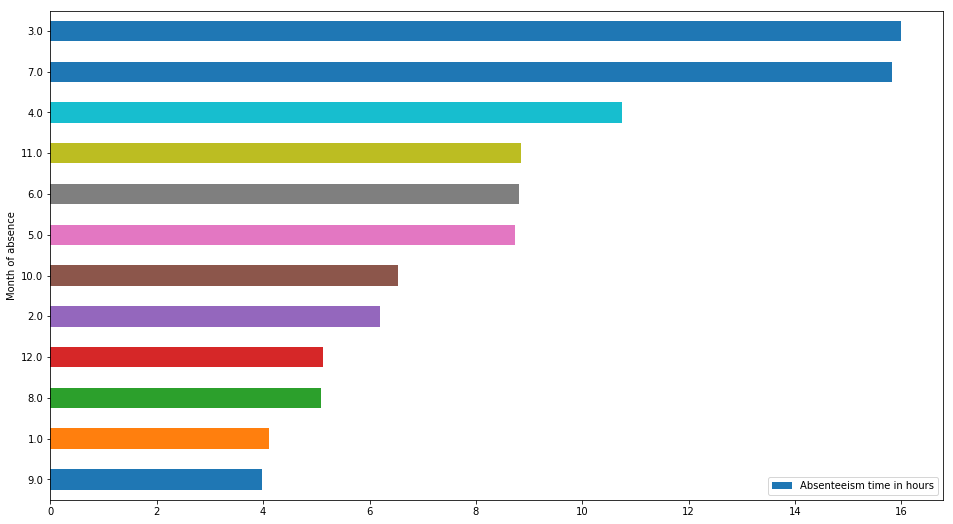

In [20]:
relationship('Month of absence','Absenteeism time in hours')

   Seasons  Absenteeism time in hours
3        4                  19.513827
1        2                  23.371989
0        1                  24.375558
2        3                  32.738626


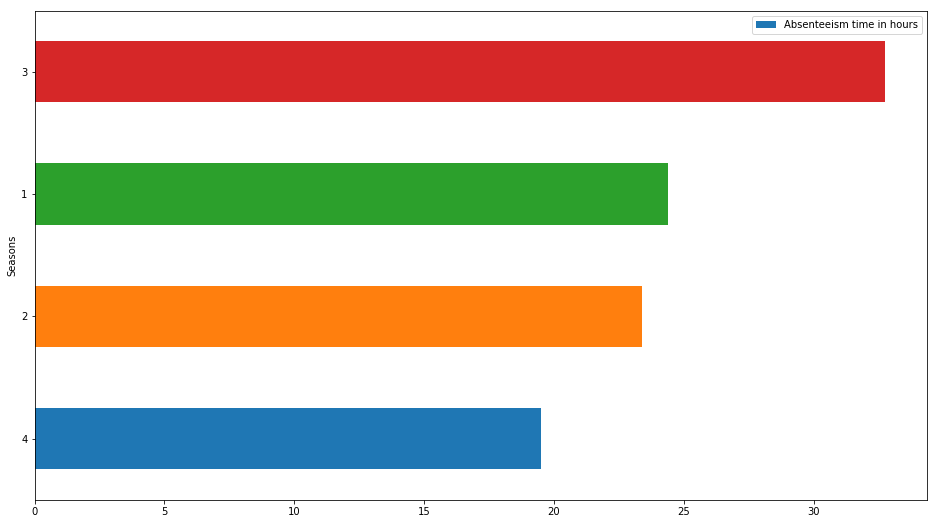

In [21]:
relationship('Seasons','Absenteeism time in hours')

   Education  Absenteeism time in hours
3        4.0                   0.468332
1        2.0                   5.999108
2        3.0                   8.541481
0        1.0                  84.991079


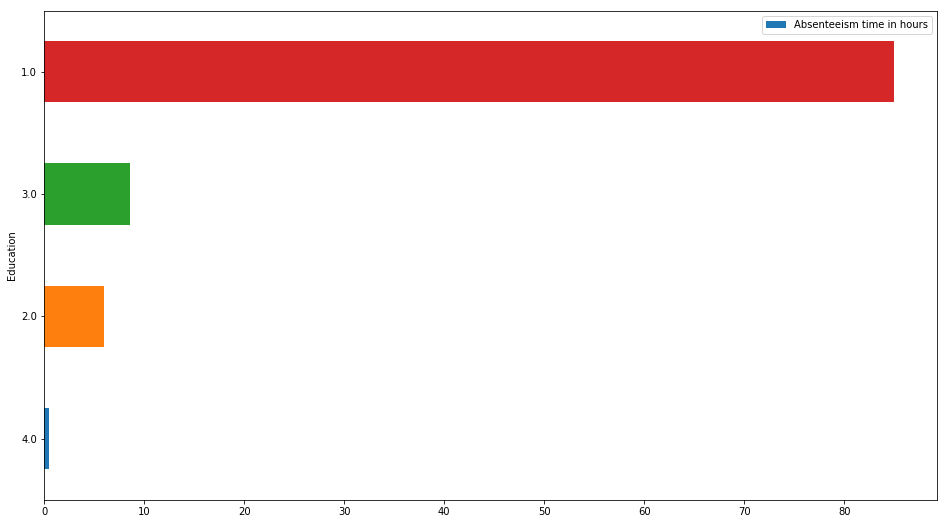

In [22]:
relationship('Education','Absenteeism time in hours')

   Son  Absenteeism time in hours
3  3.0                   3.657449
4  4.0                   5.753791
1  1.0                  27.586976
0  0.0                  28.902765
2  2.0                  34.099019


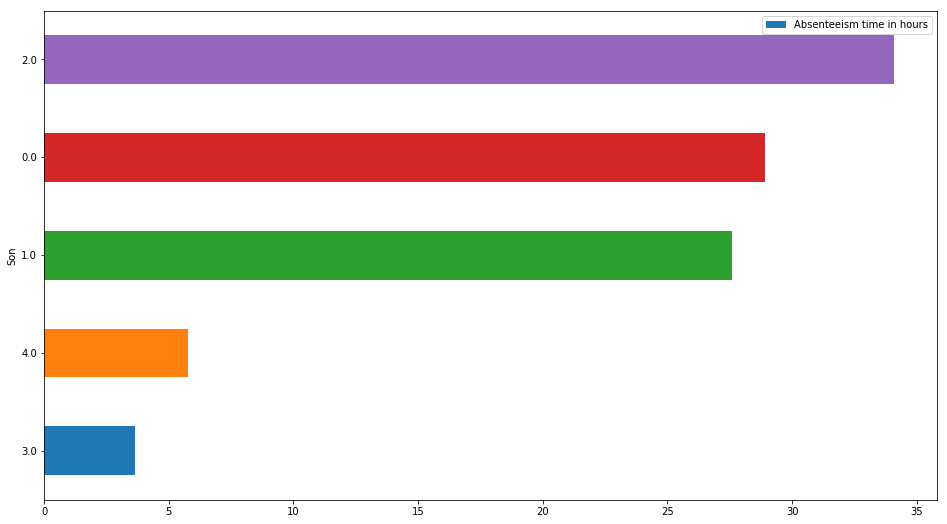

In [23]:
relationship('Son','Absenteeism time in hours')

   Social drinker  Absenteeism time in hours
0             0.0                  36.284567
1             1.0                  63.715433
   Social smoker  Absenteeism time in hours
1            1.0                    9.70116
0            0.0                   90.29884


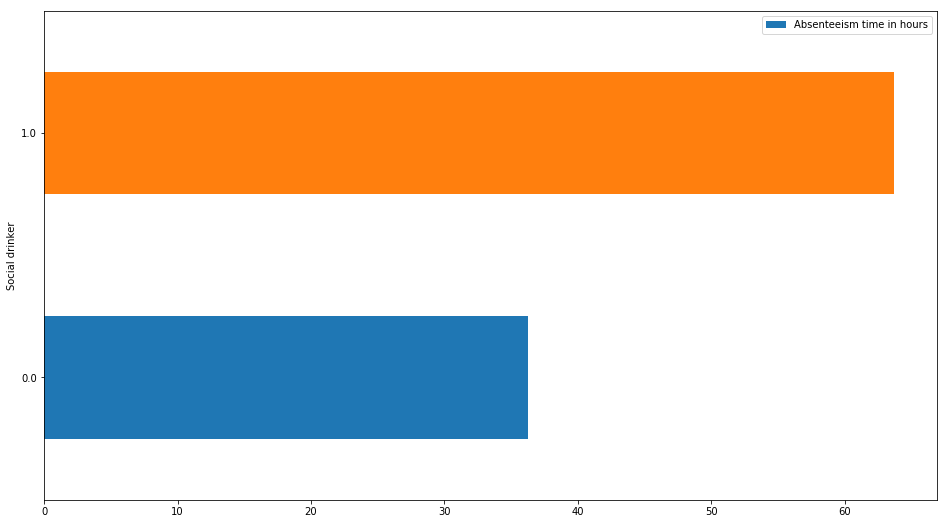

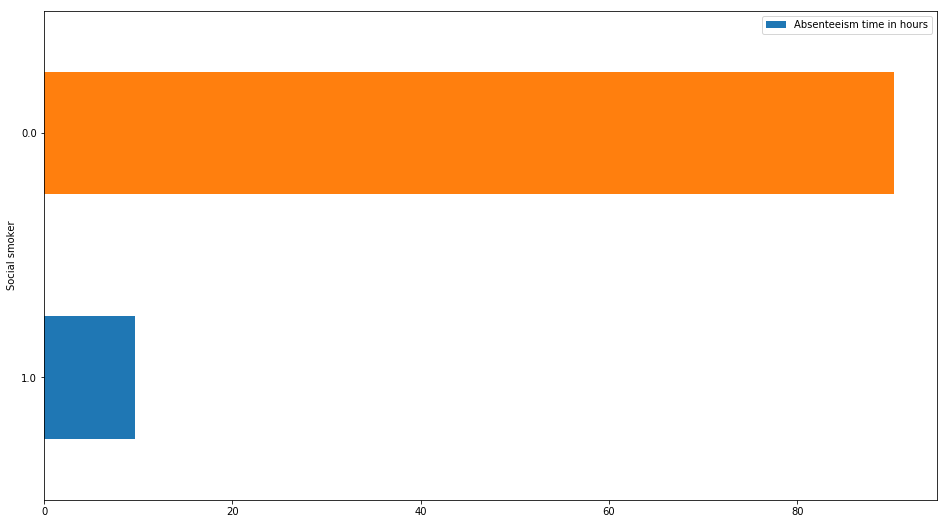

In [24]:
relationship('Social drinker','Absenteeism time in hours')
relationship('Social smoker','Absenteeism time in hours')

   Pet  Absenteeism time in hours
4  5.0                   0.379126
5  8.0                   0.758252
3  4.0                   3.768956
2  2.0                   9.411240
1  1.0                  25.423729
0  0.0                  60.258698


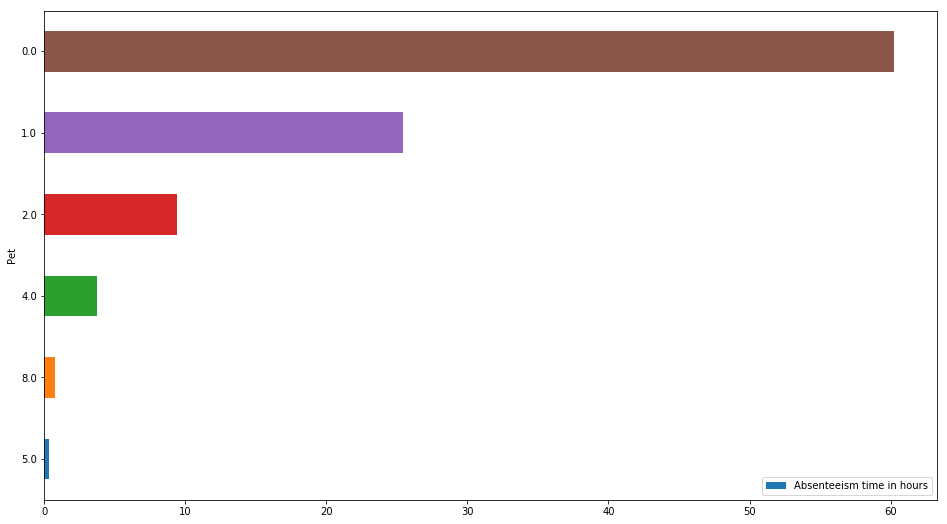

In [25]:
relationship('Pet','Absenteeism time in hours')

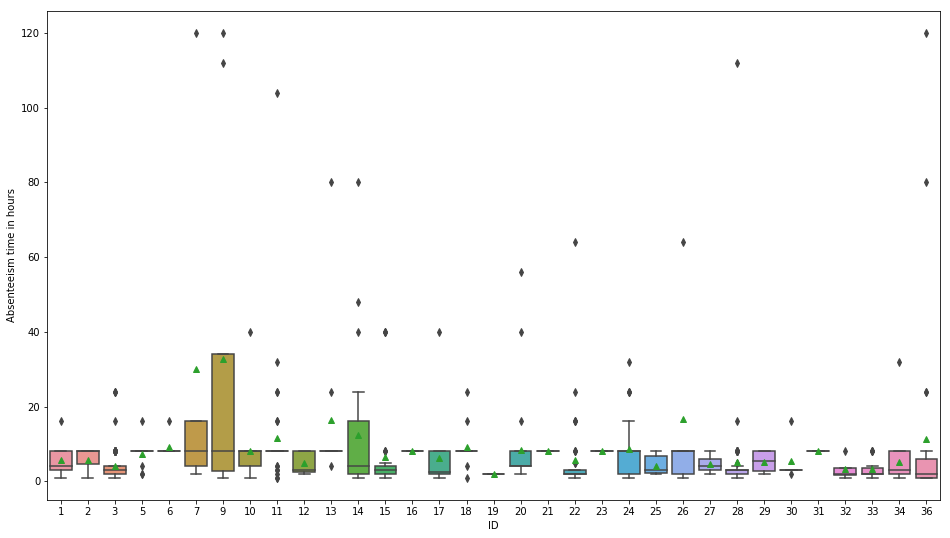

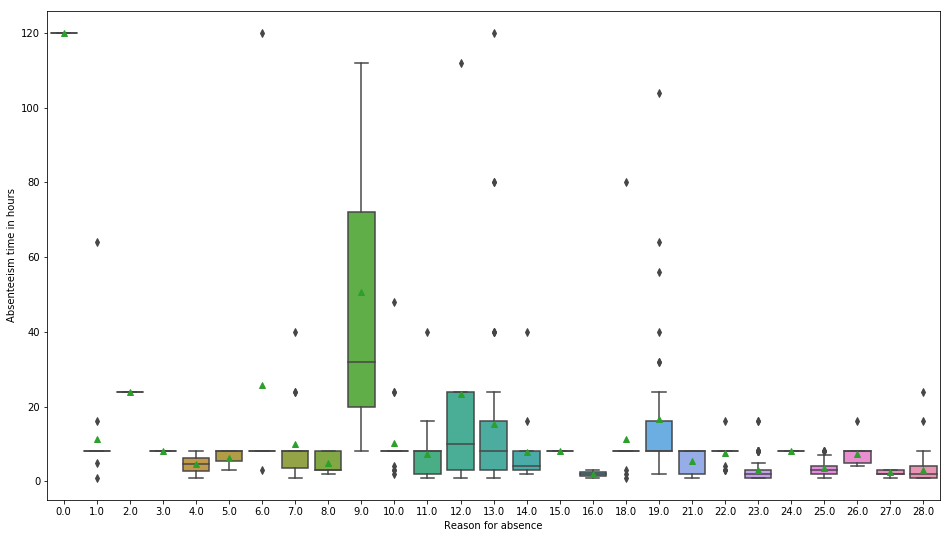

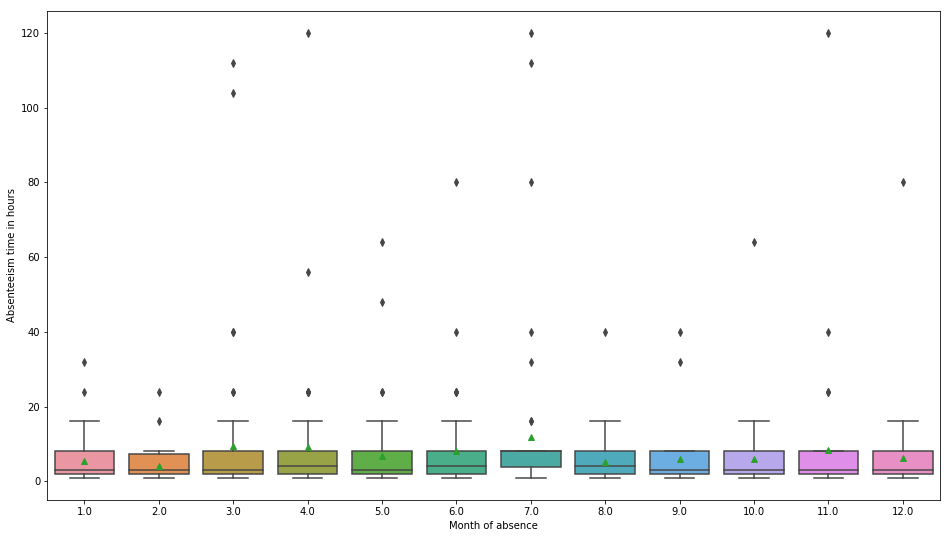

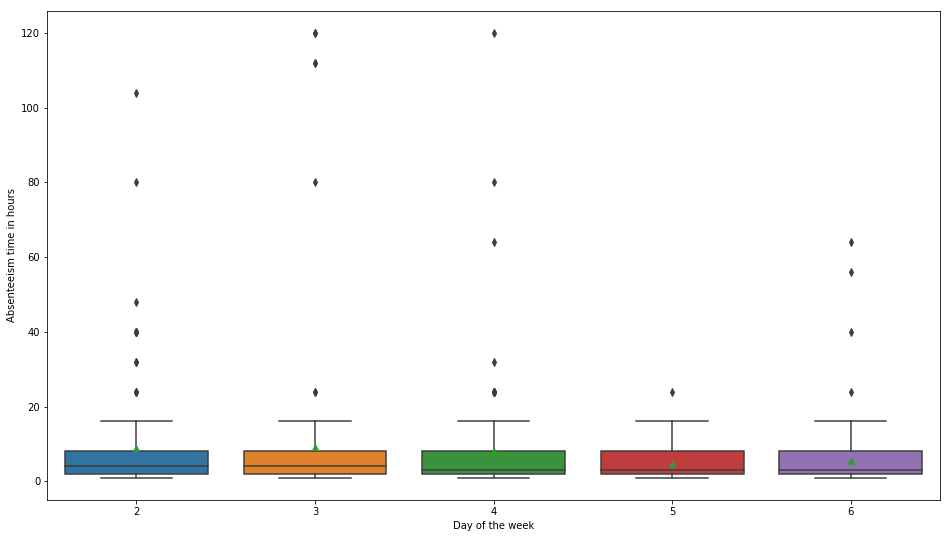

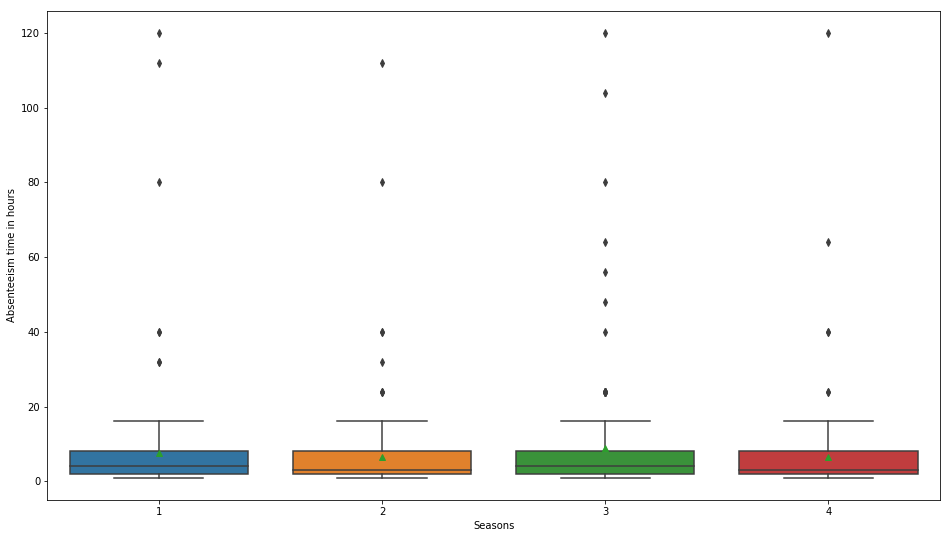

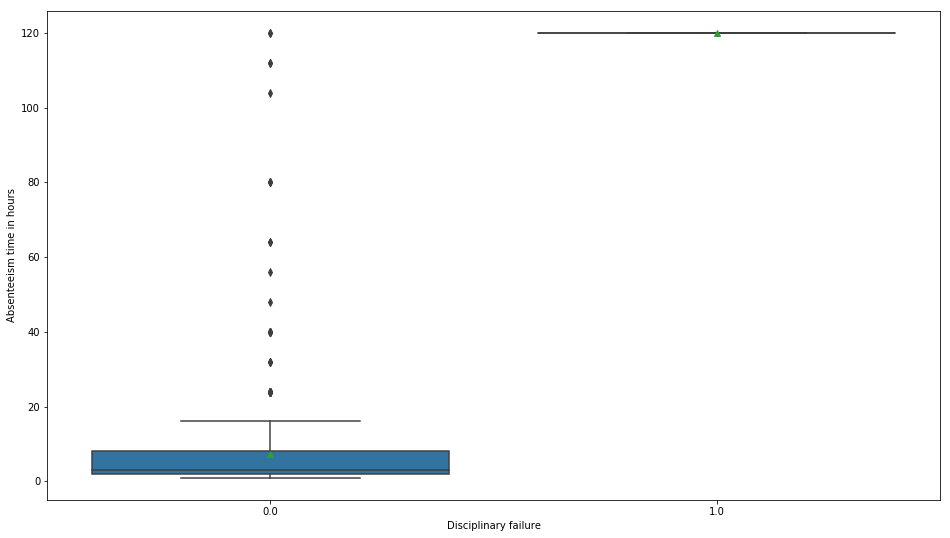

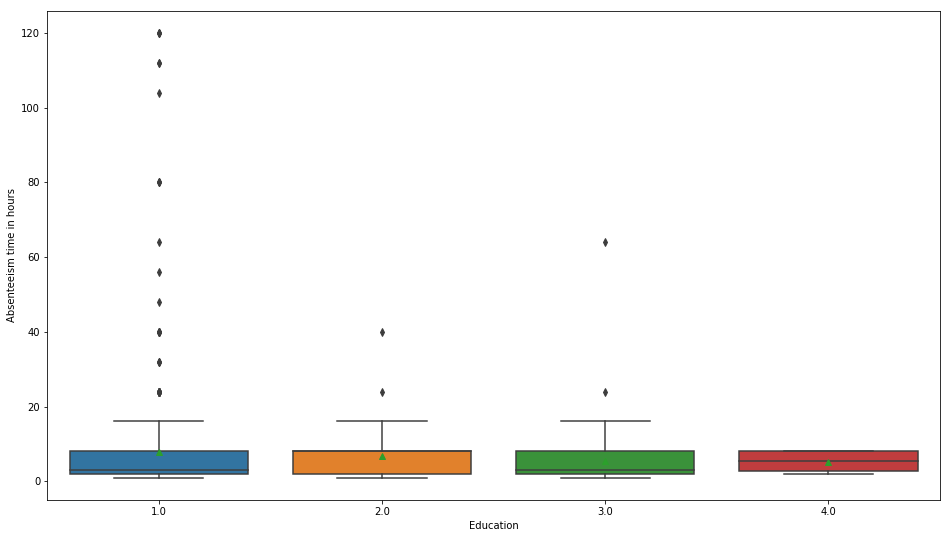

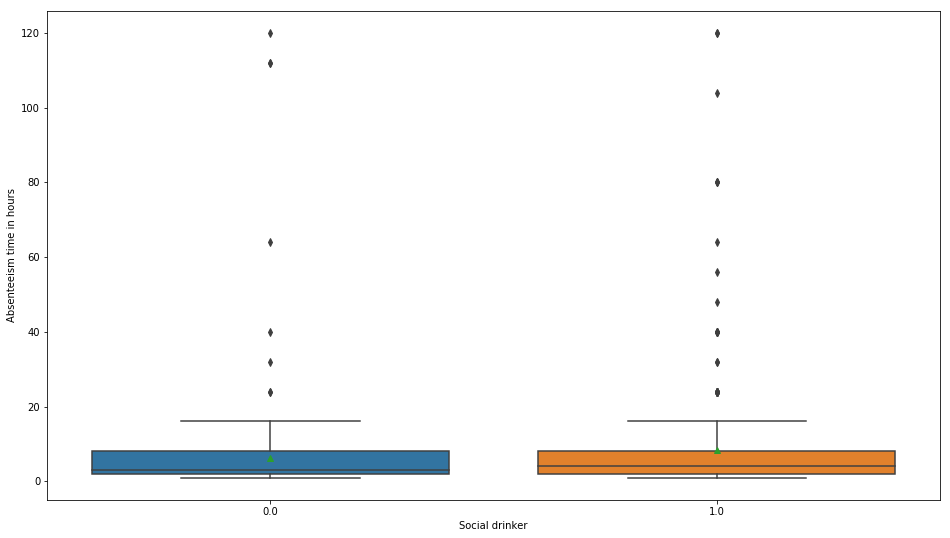

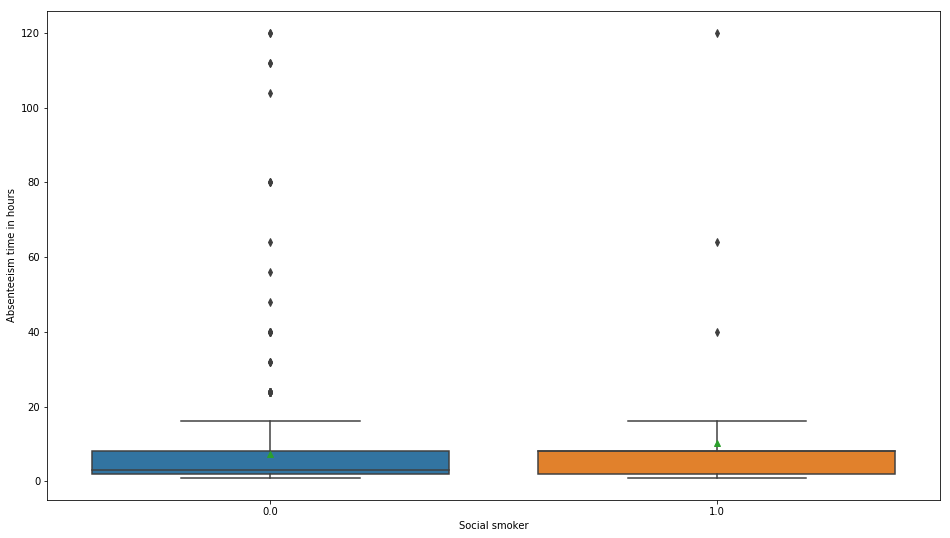

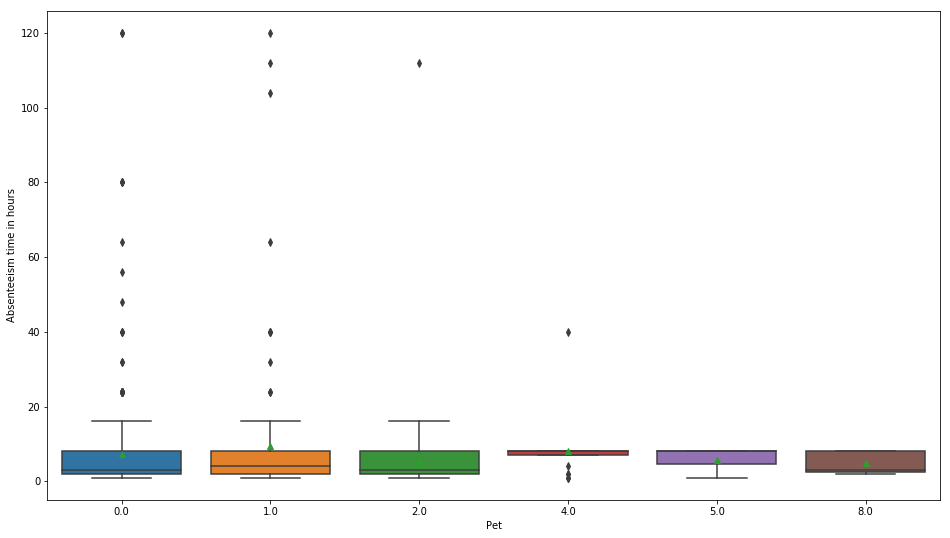

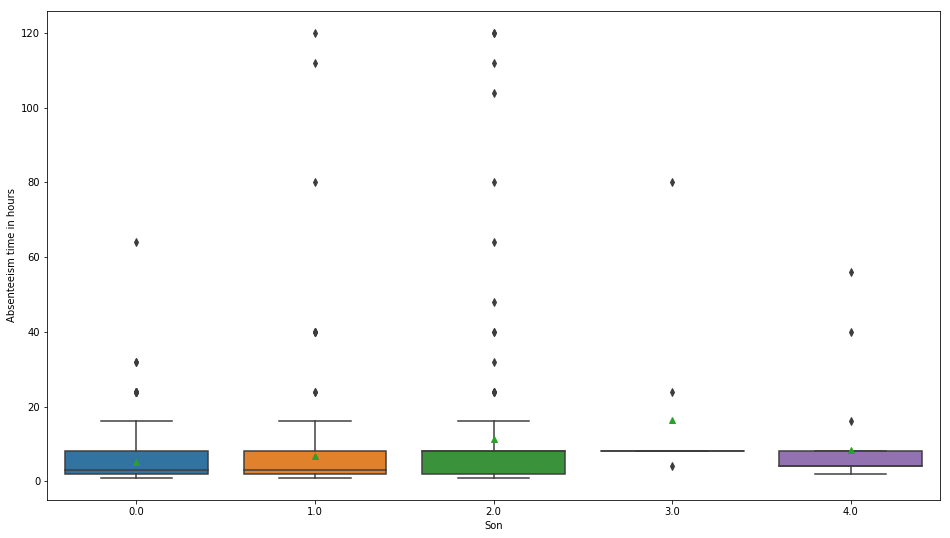

ID                      None
Reason for absence      None
Month of absence        None
Day of the week         None
Seasons                 None
Disciplinary failure    None
Education               None
Social drinker          None
Social smoker           None
Pet                     None
Son                     None
dtype: object

In [26]:
#Box plot between categorical independent and continuous dependent variables    
def boxplots(col):
    sns.boxplot(x= col, y = emp1['Absenteeism time in hours'], showmeans=True)
    plt.show()
    
emp1[categorical_vars].apply(boxplots)

# Outlier Treatment: 

In [27]:
#Outlier Analysis and Treatment:
#Box-plot visualisation:

In [28]:
emp1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

F:\Python files\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


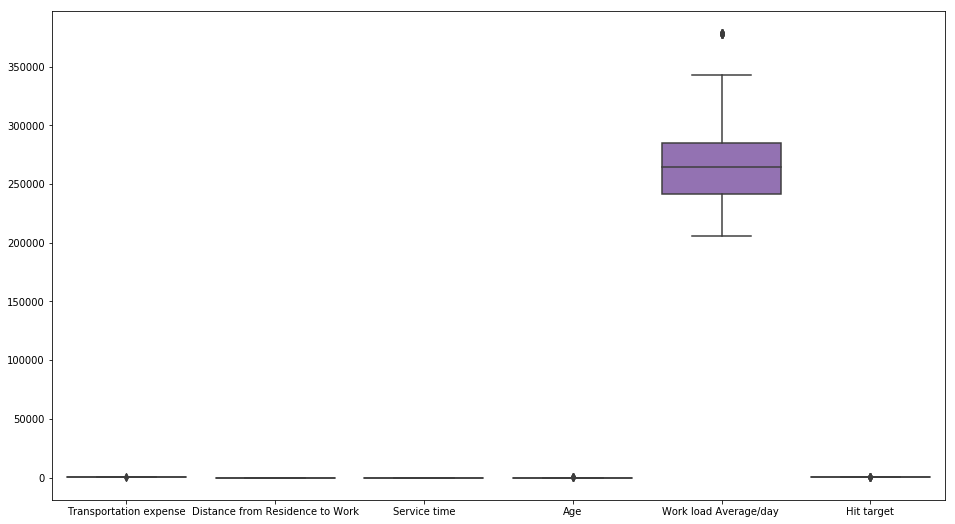

In [29]:
sns.boxplot(data=emp1.ix[:,5:11])

F:\Python files\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


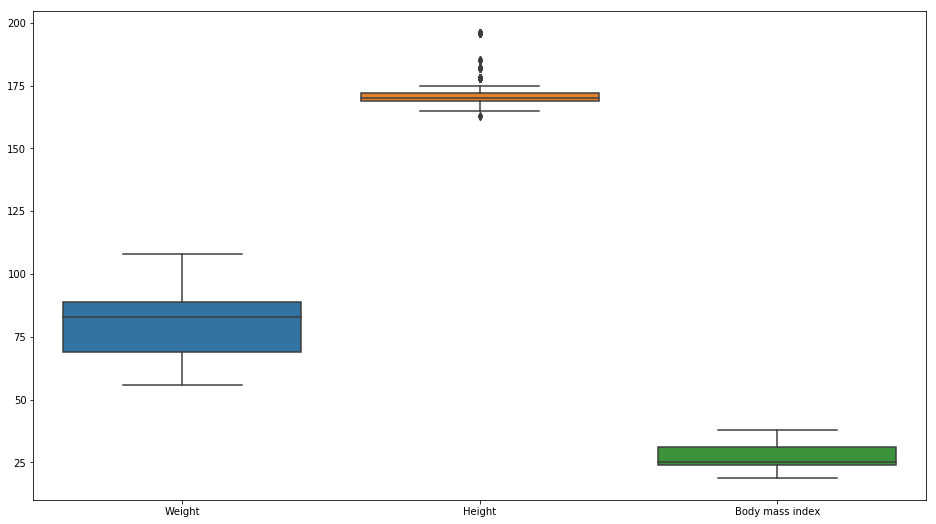

In [30]:
sns.boxplot(data=emp1.ix[:,17:20])

In [31]:
for i in continuous_vars:
    print(i)
    q75,q25=np.percentile(emp1.loc[:,i],[75,25])
    iqr=q75-q25
    
    min=q25-(1.5*iqr)
    max=q75+(1.5*iqr)
    print(min)
    print(max)
    emp1.loc[emp1[i] < min,i] = min
    emp1.loc[emp1[i] > max,i] = max
    
    

Transportation expense
57.5
381.5


F:\Python files\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Distance from Residence to Work
-35.0
101.0
Service time
-3.0
29.0
Age
17.5
53.5
Work load Average/day 
176410.5
349918.5
Hit target
85.5
105.5
Weight
39.0
119.0
Height
164.5
176.5
Body mass index
13.5
41.5
Absenteeism time in hours
-7.0
17.0


F:\Python files\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


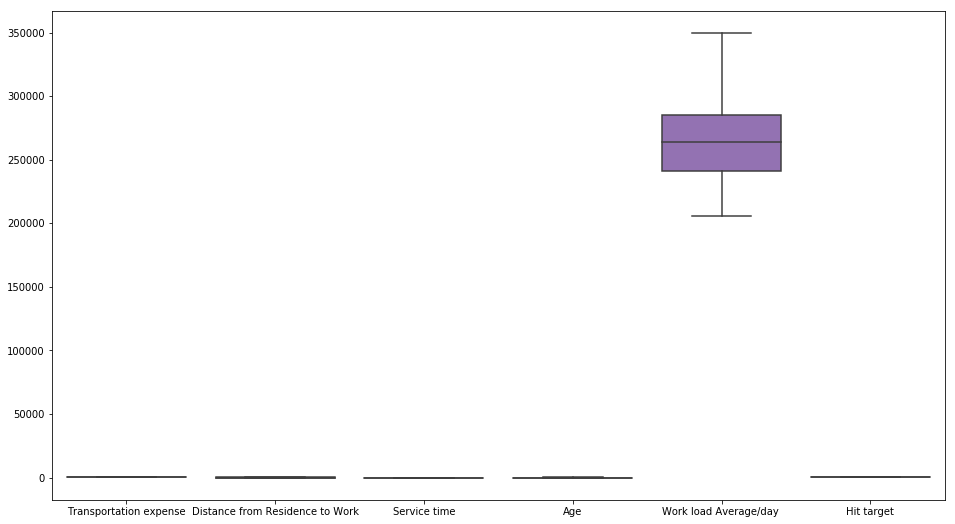

In [32]:
sns.boxplot(data=emp1.ix[:,5:11])

F:\Python files\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


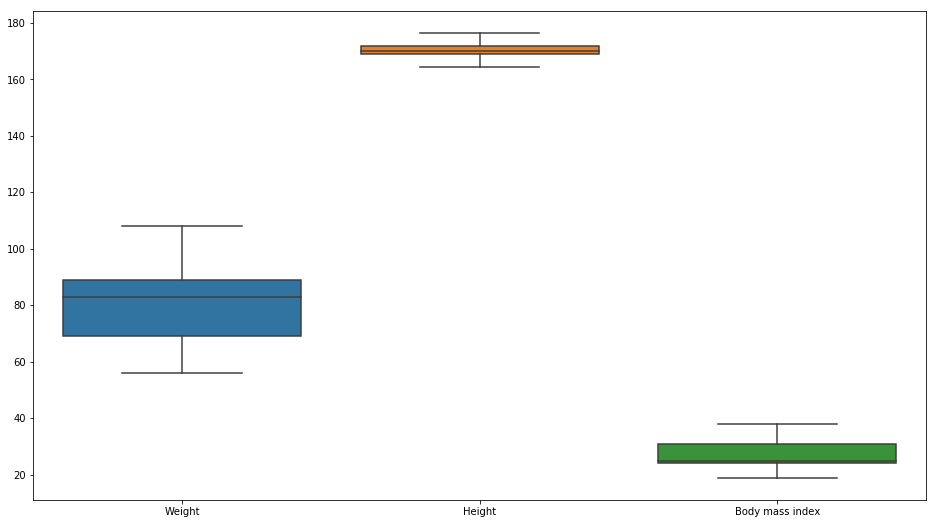

In [33]:
sns.boxplot(data=emp1.ix[:,17:20])

# Feature Selection

In [34]:
#Correlation:
corr = emp1.loc[:,continuous_vars]
corr = corr.corr()

In [35]:
corr

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.216423,-0.358485,-0.216362,-0.000419,-0.063997,-0.187641,-0.161371,-0.111822,0.184256
Distance from Residence to Work,0.216423,1.000000,0.163002,-0.130770,-0.063092,-0.014672,0.006209,-0.333643,0.174845,-0.082126
Service time,-0.358485,0.163002,1.000000,0.678092,0.008177,0.009840,0.470290,-0.103086,0.519562,-0.052590
Age,-0.216362,-0.130770,0.678092,1.000000,-0.053728,-0.018537,0.422135,-0.012770,0.480798,-0.013334
Work load Average/day,-0.000419,-0.063092,0.008177,-0.053728,1.000000,-0.073497,-0.030017,0.039501,-0.084897,0.129220
Hit target,-0.063997,-0.014672,0.009840,-0.018537,-0.073497,1.000000,-0.025419,0.068818,-0.063801,0.000893
Weight,-0.187641,0.006209,0.470290,0.422135,-0.030017,-0.025419,1.000000,0.252202,0.901747,0.023913
Height,-0.161371,-0.333643,-0.103086,-0.012770,0.039501,0.068818,0.252202,1.000000,-0.123746,0.094528
Body mass index,-0.111822,0.174845,0.519562,0.480798,-0.084897,-0.063801,0.901747,-0.123746,1.000000,-0.030359
Absenteeism time in hours,0.184256,-0.082126,-0.052590,-0.013334,0.129220,0.000893,0.023913,0.094528,-0.030359,1.000000


In [36]:
corr.style.background_gradient(cmap='coolwarm')

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1,0.216423,-0.358485,-0.216362,-0.000419361,-0.0639974,-0.187641,-0.161371,-0.111822,0.184256
Distance from Residence to Work,0.216423,1,0.163002,-0.13077,-0.0630917,-0.0146716,0.0062089,-0.333643,0.174845,-0.0821255
Service time,-0.358485,0.163002,1,0.678092,0.00817686,0.00984036,0.47029,-0.103086,0.519562,-0.0525903
Age,-0.216362,-0.13077,0.678092,1,-0.0537277,-0.0185365,0.422135,-0.0127698,0.480798,-0.0133345
Work load Average/day,-0.000419361,-0.0630917,0.00817686,-0.0537277,1,-0.073497,-0.030017,0.0395006,-0.0848966,0.12922
Hit target,-0.0639974,-0.0146716,0.00984036,-0.0185365,-0.073497,1,-0.0254192,0.0688185,-0.0638012,0.000893046
Weight,-0.187641,0.0062089,0.47029,0.422135,-0.030017,-0.0254192,1,0.252202,0.901747,0.0239127
Height,-0.161371,-0.333643,-0.103086,-0.0127698,0.0395006,0.0688185,0.252202,1,-0.123746,0.094528
Body mass index,-0.111822,0.174845,0.519562,0.480798,-0.0848966,-0.0638012,0.901747,-0.123746,1,-0.030359
Absenteeism time in hours,0.184256,-0.0821255,-0.0525903,-0.0133345,0.12922,0.000893046,0.0239127,0.094528,-0.030359,1


In [37]:
#ANOVA:
for i in categorical_vars:
    f, p = stats.f_oneway(emp1[i], emp1["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 2.0247739856773534e-115
P value for variable Reason for absence is 3.7438652603911194e-241
P value for variable Month of absence is 0.0005785048483389389
P value for variable Day of the week is 4.2765066825678926e-14
P value for variable Seasons is 1.3817626791262873e-48
P value for variable Disciplinary failure is 1.4583798353158297e-144
P value for variable Education is 3.0984525932406627e-90
P value for variable Social drinker is 3.590071729190154e-120
P value for variable Social smoker is 1.9707770043622747e-141
P value for variable Pet is 1.9902917598297433e-108
P value for variable Son is 1.867244634985227e-99


In [38]:
#Removing multicollinearity variables:
emp1 = emp1.drop(['Weight'],axis=1)

In [39]:
emp1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

# Feature Scaling

In [40]:
continuous_vars = ['Transportation expense','Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',
                   'Hit target', 'Height', 'Body mass index', 'Absenteeism time in hours']

F:\Python files\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


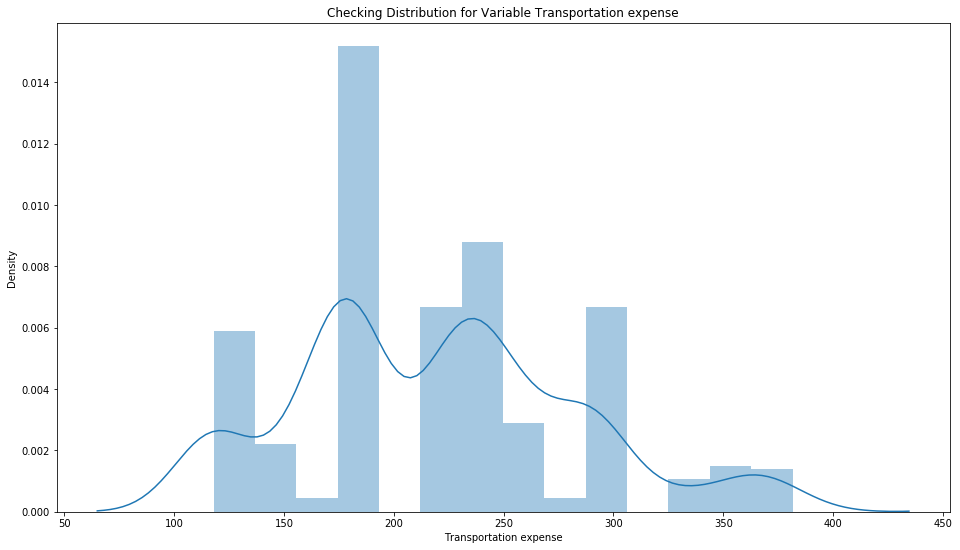

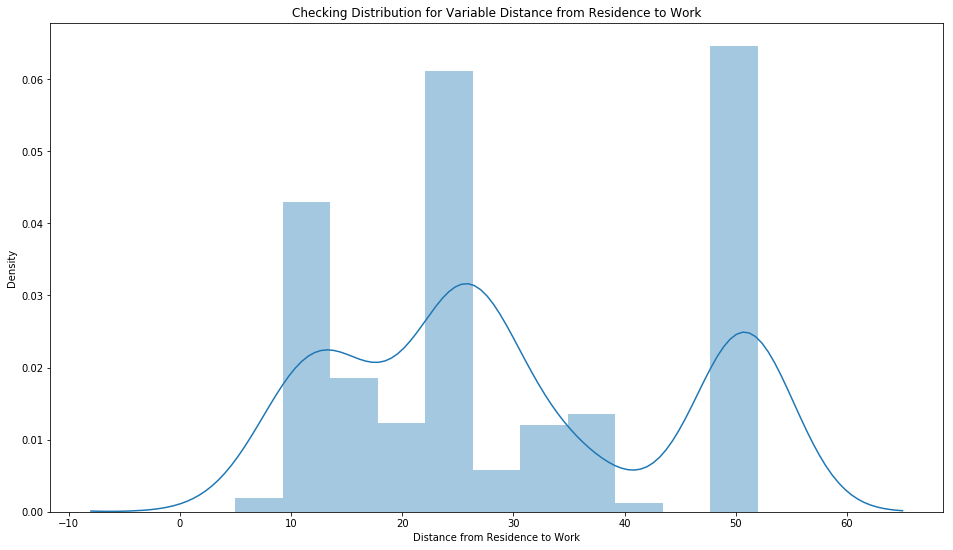

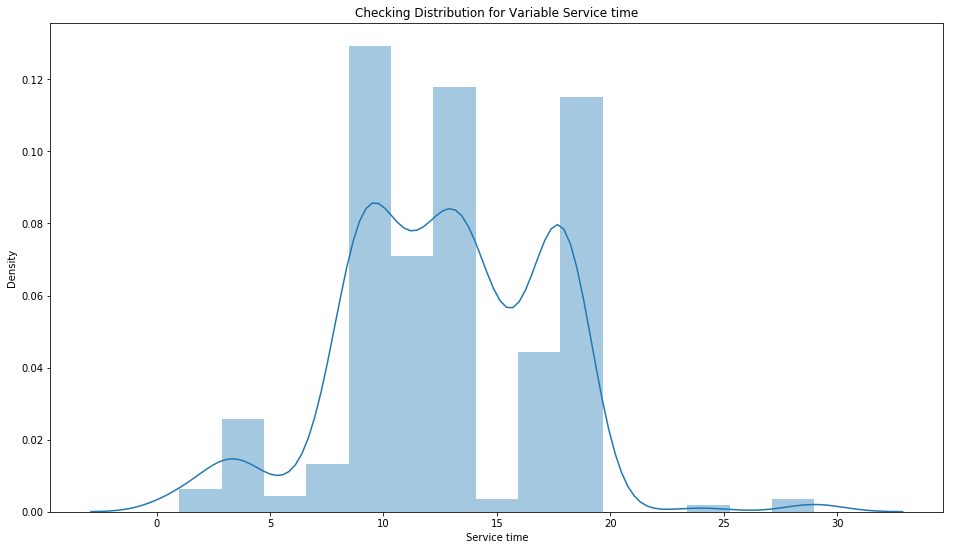

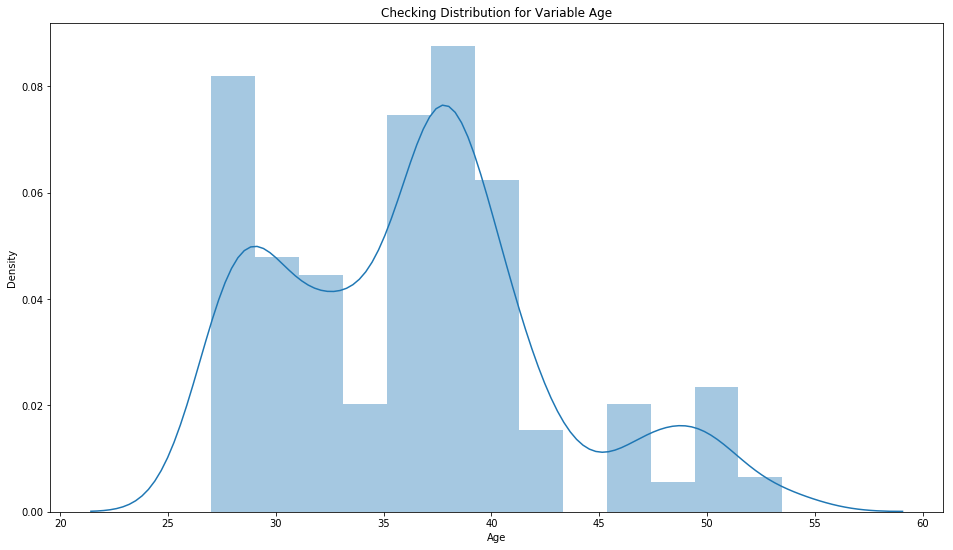

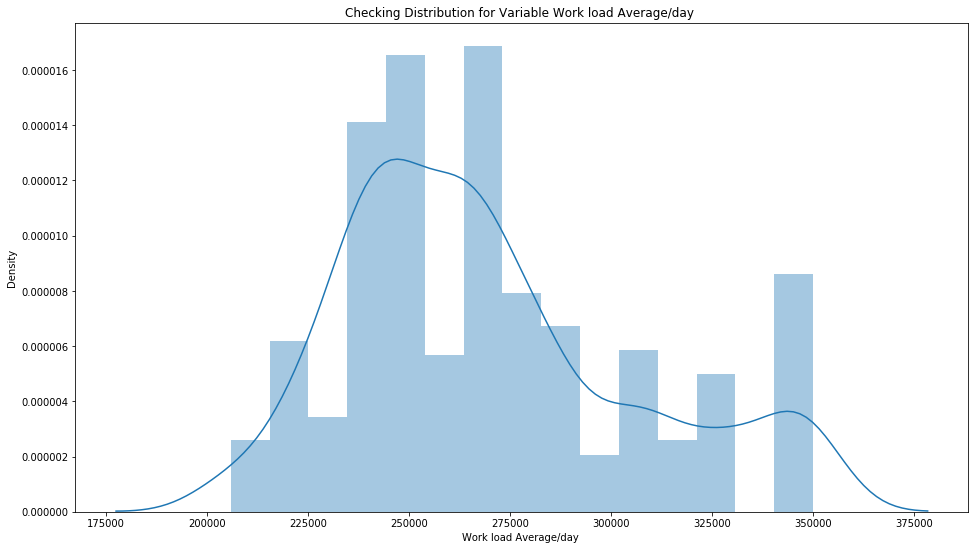

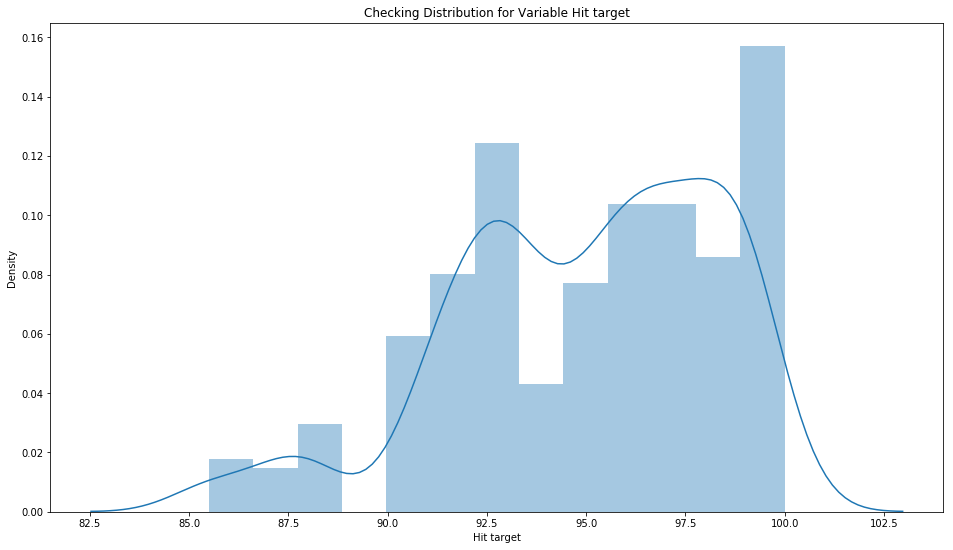

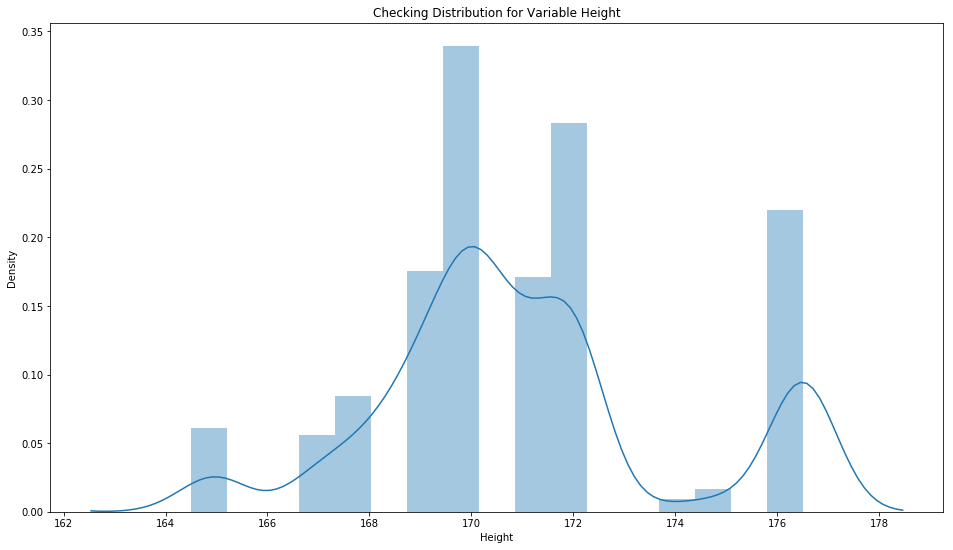

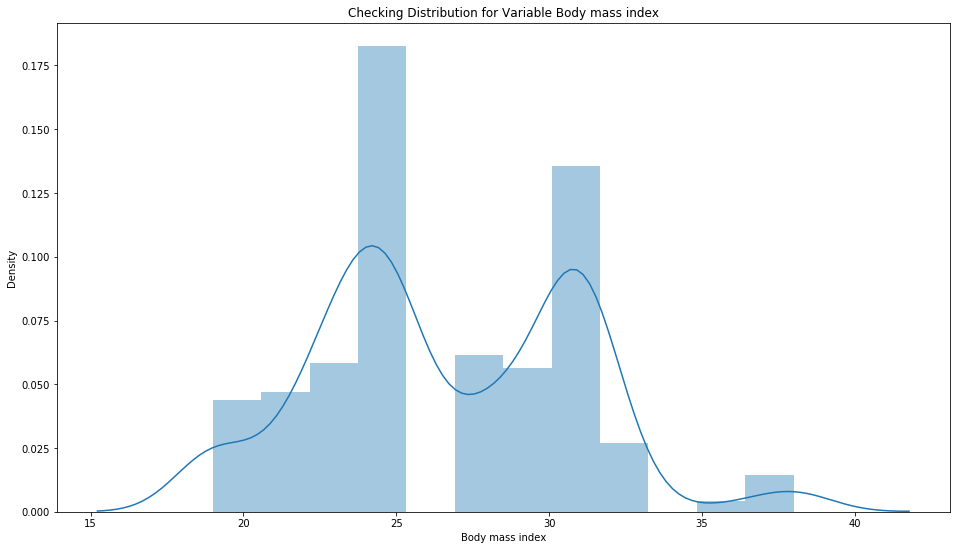

In [41]:
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(emp1[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [42]:
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    emp1[i] = (emp1[i] - emp1[i].min())/(emp1[i].max()-emp1[i].min())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023421C239E8>,
      dtype=object)

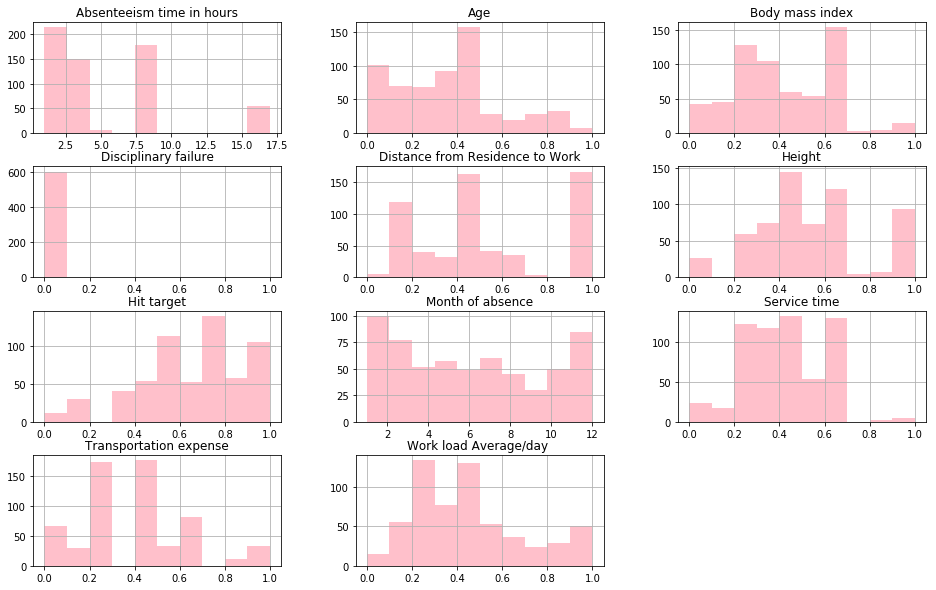

In [43]:
plt.rcParams["figure.figsize"] = [16,9]
emp1.hist(figsize = (16,10),color="pink")

# Dummy Variable creation

In [44]:
categorical_vars

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Son']

In [45]:
dummies1 = pd.get_dummies(emp1['Reason for absence'],prefix='Reason').iloc[:,1:]
print(dummies1.head())
dummies2 = pd.get_dummies(emp1['Month of absence'],prefix='Month').iloc[:,1:]
print(dummies2.head())
dummies3 = pd.get_dummies(emp1['Day of the week'],prefix='Day').iloc[:,1:]
print(dummies3.head())
dummies4 = pd.get_dummies(emp1['Seasons'],prefix='Seasons').iloc[:,1:]
print(dummies4.head())
dummies5 = pd.get_dummies(emp1['Education'],prefix='Education').iloc[:,1:]
print(dummies5.head())
dummies6 = pd.get_dummies(emp1['Pet'],prefix='Pet').iloc[:,1:]
print(dummies6.head())
dummies7 = pd.get_dummies(emp1['Son'],prefix='Son').iloc[:,1:]
print(dummies7.head())

   Reason_1.0  Reason_2.0  Reason_3.0  Reason_4.0  Reason_5.0  Reason_6.0  \
0           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
7           0           0           0           0           0           0   

   Reason_7.0  Reason_8.0  Reason_9.0  Reason_10.0     ...       Reason_18.0  \
0           0           0           0            0     ...                 0   
2           0           0           0            0     ...                 0   
3           1           0           0            0     ...                 0   
4           0           0           0            0     ...                 0   
7           0           0           0            0     ...                 0   

   Reason_19.0  Reason_21.0  Reason_22.0  Reason_23.0  R

In [46]:
#now merge dummies and emp1 into emp2
emp2=pd.concat([emp1,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7],axis=1)
emp2.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education_4.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
0,11,26,7.0,3,1,0.648956,0.659574,0.428571,0.226415,0.233588,...,0,1,0,0,0,0,0,1,0,0
2,3,23,7.0,4,1,0.231499,0.978723,0.607143,0.415094,0.233588,...,0,0,0,0,0,0,0,0,0,0
3,7,7,7.0,5,1,0.611006,0.000000,0.464286,0.452830,0.233588,...,0,0,0,0,0,0,0,1,0,0
4,11,23,7.0,5,1,0.648956,0.659574,0.428571,0.226415,0.233588,...,0,1,0,0,0,0,0,1,0,0
7,20,23,7.0,6,1,0.538899,0.957447,0.357143,0.339623,0.233588,...,0,0,0,0,0,0,0,0,0,1


In [47]:
emp3=emp2.drop(['ID','Reason for absence','Month of absence','Day of the week','Seasons','Education','Pet','Son'],axis=1)
emp3.head(2)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Height,...,Education_4.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
0,0.648956,0.659574,0.428571,0.226415,0.233588,0.793103,0.0,1,0,0.625000,...,0,1,0,0,0,0,0,1,0,0
2,0.231499,0.978723,0.607143,0.415094,0.233588,0.793103,0.0,1,0,0.458333,...,0,0,0,0,0,0,0,0,0,0


In [48]:
emp3.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Social drinker', 'Social smoker', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'Reason_1.0',
       'Reason_2.0', 'Reason_3.0', 'Reason_4.0', 'Reason_5.0', 'Reason_6.0',
       'Reason_7.0', 'Reason_8.0', 'Reason_9.0', 'Reason_10.0', 'Reason_11.0',
       'Reason_12.0', 'Reason_13.0', 'Reason_14.0', 'Reason_15.0',
       'Reason_16.0', 'Reason_18.0', 'Reason_19.0', 'Reason_21.0',
       'Reason_22.0', 'Reason_23.0', 'Reason_24.0', 'Reason_25.0',
       'Reason_26.0', 'Reason_27.0', 'Reason_28.0', 'Month_2.0', 'Month_3.0',
       'Month_4.0', 'Month_5.0', 'Month_6.0', 'Month_7.0', 'Month_8.0',
       'Month_9.0', 'Month_10.0', 'Month_11.0', 'Month_12.0', 'Day_3', 'Day_4',
       'Day_5', 'Day_6', 'Seasons_2', 'Seasons_3', 'Seasons_4',
       'Education_2.0', 'Education_3.0', 'Education_4.0', 'Pet_1.0

# Modeling

Linear Regression model (optional)

In [49]:
x=emp3.iloc[:, emp3.columns != 'Absenteeism time in hours']
y=emp3['Absenteeism time in hours']

In [50]:
import statsmodels.api as sm

In [51]:
model1=sm.OLS(y,x.astype(float)).fit()

In [52]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.465
Model:                                   OLS   Adj. R-squared:                  0.399
Method:                        Least Squares   F-statistic:                     7.087
Date:                       Mon, 15 Apr 2019   Prob (F-statistic):           3.08e-41
Time:                               23:37:55   Log-Likelihood:                -1572.5
No. Observations:                        605   AIC:                             3279.
Df Residuals:                            538   BIC:                             3574.
Df Model:                                 66                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation expense              1.2490      1.546      0.808      0.419      -1.787       4.285
Distance from Residence to Work    -2.6348      1.410     -1.869      0.062      -5.404       0.135
Service time                        1.7568      3.138      0.560      0.576      -4.407       7.920
Age                                -1.2506      1.844     -0.678      0.498      -4.873       2.372
Work load Average/day               0.8908      0.728      1.223      0.222      -0.540       2.321
Hit target                         -0.2730      1.076     -0.254      0.800      -2.387       1.841
Disciplinary failure               13.0797      4.196      3.117      0.002       4.837      21.322
Social drinker                      2.0259      1.174      1.725      0.085      -0.281       4.333
Social smoker                      -1.1924      0.846     -1.410      0.159      -2.854       0.469
Height                             -0.5810      0.985     -0.590      0.556      -2.516       1.354
Body mass index                    -0.6258      1.089     -0.575      0.566      -2.764       1.513
Reason_1.0                          5.0956      2.310      2.206      0.028       0.557       9.634
Reason_2.0                         12.5013      4.172      2.997      0.003       4.307      20.696
Reason_3.0                          4.9334      4.044      1.220      0.223      -3.011      12.878
Reason_4.0                          1.7414      3.348      0.520      0.603      -4.835       8.318
Reason_5.0                          4.5130      2.844      1.587      0.113      -1.074      10.100
Reason_6.0                          5.6802      2.556      2.223      0.027       0.660      10.700
Reason_7.0                          4.0917      2.197      1.862      0.063      -0.224       8.408
Reason_8.0                          2.6085      2.487      1.049      0.295      -2.278       7.495
Reason_9.0                         11.2076      2.774      4.040      0.000       5.758      16.657
Reason_10.0                         4.7506      2.137      2.223      0.027       0.553       8.948
Reason_11.0                         3.0763      2.168      1.419      0.157      -1.183       7.335
Reason_12.0                         7.3574      2.340      3.144      0.002       2.761      11.954
Reason_13.0                         5.4452      2.083      2.614      0.009       1.353       9.538
Reason_14.0                         3.2014      2.192      1.460      0.145      -1.105       7.507
Reason_15.0                         4.5373      3.240      1.400      0.162      -1.828      10.903
Reason_16.0                        -0.6054      2.898     -0.209      0.835      -6.297       5.087
Reason

In [53]:
emp1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

_______________________________________________________________________________________________________________________________

# Time Series Forecasting for 2011

In [157]:
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [158]:
ts=pd.DataFrame([emp1['Month of absence'],emp1['Absenteeism time in hours']]).transpose()
ts.tail()

,Month of absence,Absenteeism time in hours
732,7.0,8.0
733,7.0,8.0
734,7.0,17.0
735,7.0,8.0
736,7.0,4.0


In [159]:
tsd = ts.groupby('Month of absence')['Absenteeism time in hours'].sum()
tsd

Month of absence
1.0     162.0
2.0     271.0
3.0     475.0
4.0     312.0
5.0     300.0
6.0     288.0
7.0     411.0
8.0     205.0
9.0     140.0
10.0    246.0
11.0    257.0
12.0    167.0
Name: Absenteeism time in hours, dtype: float64

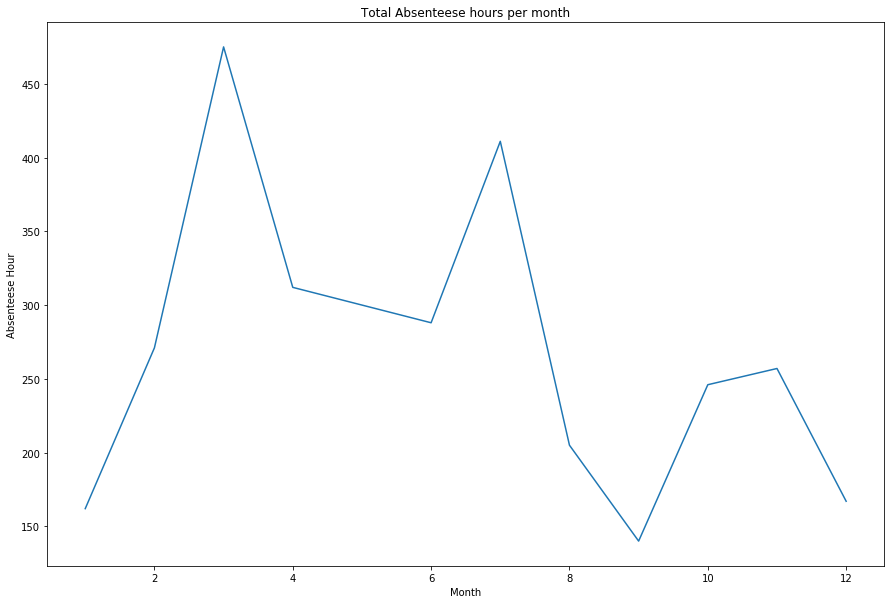

In [160]:
#Plotting tsd:
tsd.astype('float')
plt.figure(figsize=(15,10))
plt.title('Total Absenteese hours per month')
plt.xlabel('Month')
plt.ylabel('Absenteese Hour')
plt.plot(tsd)
plt.savefig('TotalAbsenteesehr_permonth.png')

In [161]:
# Stationarity tests
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(tsd)

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


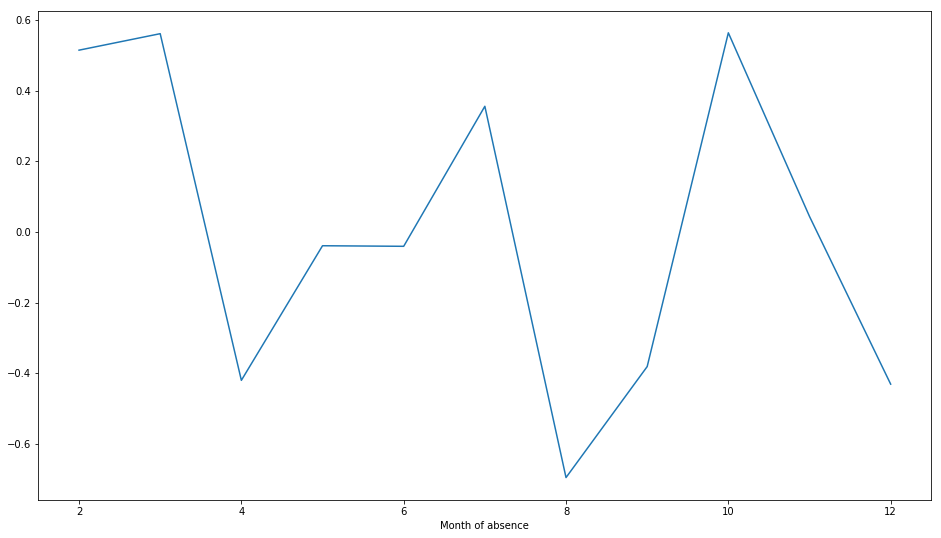

In [162]:
#Taking log:
tsdl = np.log(tsd)
tsdf = tsdl - tsdl.shift(1)
tsdf.dropna().plot()

In [163]:
tsdf

Month of absence
1.0          NaN
2.0     0.514522
3.0     0.561196
4.0    -0.420312
5.0    -0.039221
6.0    -0.040822
7.0     0.355633
8.0    -0.695583
9.0    -0.381368
10.0    0.563689
11.0    0.043745
12.0   -0.431082
Name: Absenteeism time in hours, dtype: float64

In [164]:
tsdf=tsdf[~tsdf.isin([np.nan, np.inf, -np.inf])]

In [165]:
# Stationarity tests
test_stationarity(tsdf)

Results of Dickey-Fuller Test:
Test Statistic                -2.541927
p-value                        0.105603
#Lags Used                     2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


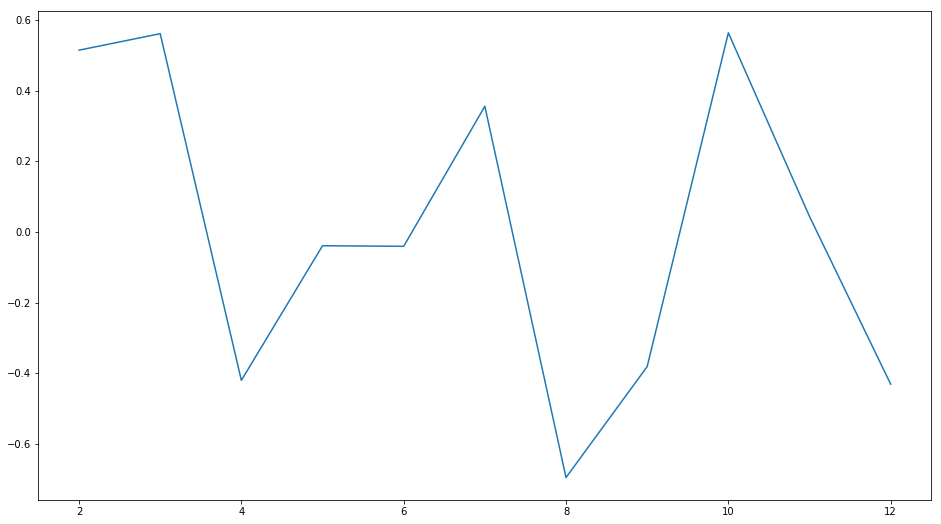

In [166]:
plt.plot(tsdf)

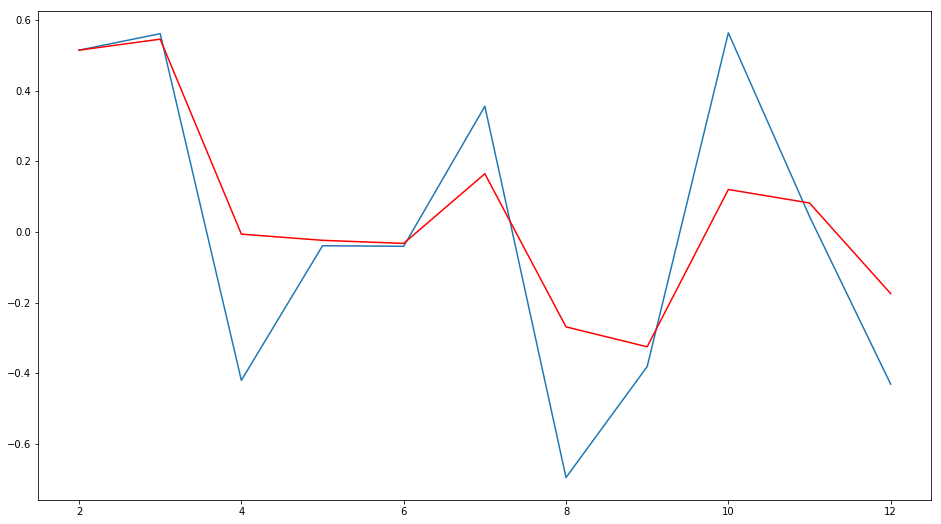

In [167]:
#To check for trend:
wa=tsdf.ewm(halflife=1,min_periods=0,adjust=True).mean()
plt.plot(tsdf)
plt.plot(wa,color='red')

In [168]:
test_stationarity(wa)

Results of Dickey-Fuller Test:
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     4.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [169]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(tsdf, nlags=10)
lag_pacf = pacf(tsdf, nlags=10, method='ols')

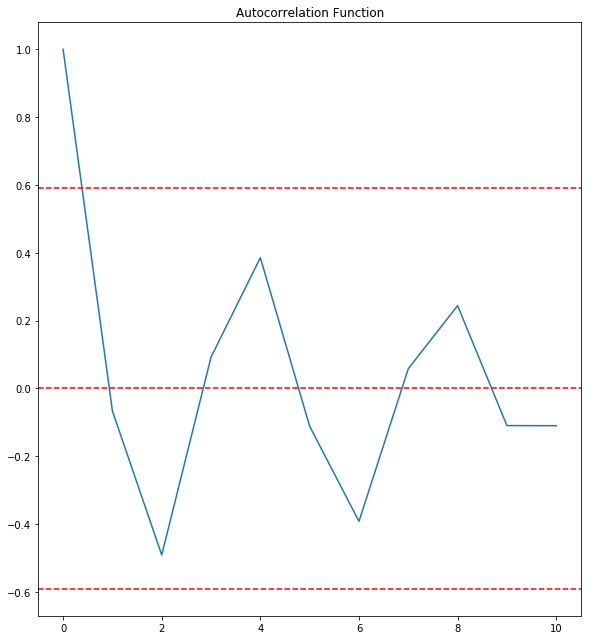

In [170]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(tsdf)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(tsdf)),linestyle='--',color='red')
plt.title('Autocorrelation Function')
plt.tight_layout()

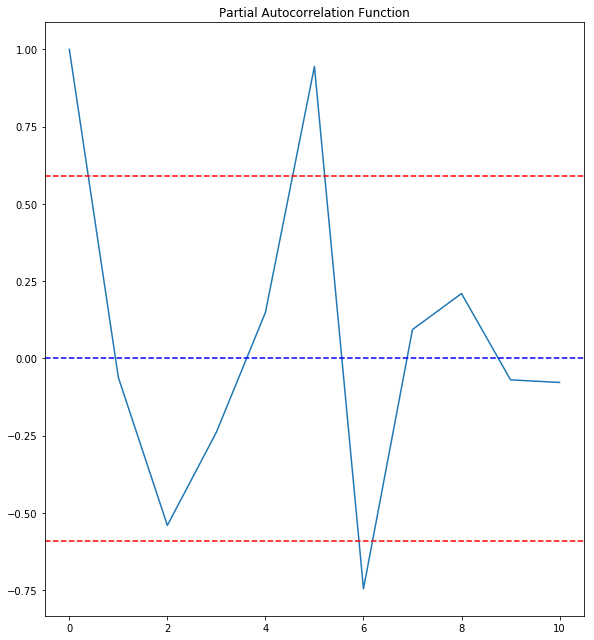

In [171]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(tsdf)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(tsdf)),linestyle='--',color='red')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

F:\Python files\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


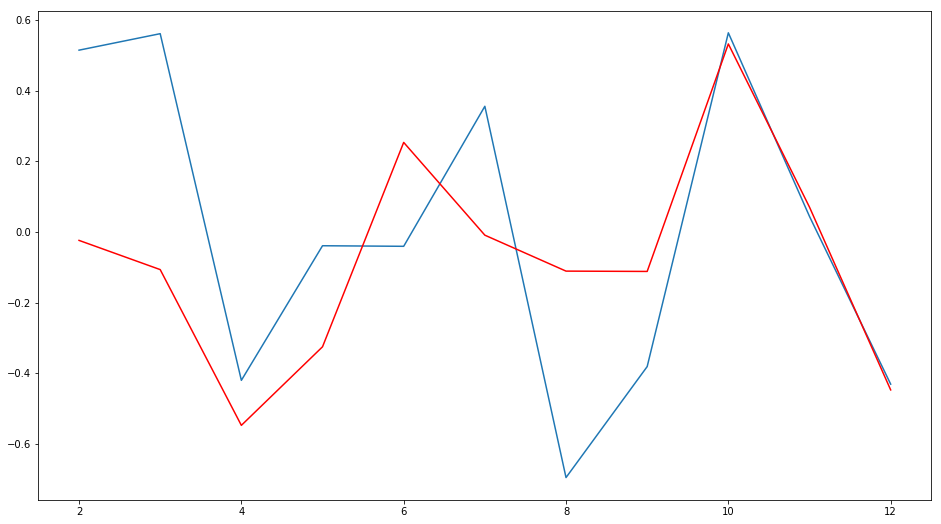

In [172]:
#Model:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(tsdf,order=(2,0,0))

AR = model.fit(disp=-1)

AR.fittedvalues

plt.plot(tsdf)
plt.plot(AR.fittedvalues,color='red')


In [173]:
RSS = (AR.fittedvalues-tsdf)**2
RSS.fillna(0,inplace=True)
sum(RSS)

1.4702673841155738

In [174]:
predict = AR.predict(start=11,end=24)

F:\Python files\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [175]:
predict

11    0.034701
12    0.241613
13   -0.133612
14   -0.179079
15    0.091740
16    0.052852
17   -0.124005
18   -0.051269
19    0.051943
20   -0.025049
21   -0.076319
22   -0.009867
23    0.008282
24   -0.042300
dtype: float64

In [176]:
predict = predict[1:]
predict

12    0.241613
13   -0.133612
14   -0.179079
15    0.091740
16    0.052852
17   -0.124005
18   -0.051269
19    0.051943
20   -0.025049
21   -0.076319
22   -0.009867
23    0.008282
24   -0.042300
dtype: float64

In [177]:
predict_cumsum = predict.cumsum()
predict_cumsum

12    0.241613
13    0.108001
14   -0.071078
15    0.020662
16    0.073514
17   -0.050491
18   -0.101760
19   -0.049817
20   -0.074866
21   -0.151185
22   -0.161051
23   -0.152770
24   -0.195070
dtype: float64

In [178]:
predicts = pd.Series(4.8, index=range(13,25))

predicts

13    4.8
14    4.8
15    4.8
16    4.8
17    4.8
18    4.8
19    4.8
20    4.8
21    4.8
22    4.8
23    4.8
24    4.8
dtype: float64

In [179]:
predicts= predicts.add(predict_cumsum,fill_value=0)
predicts

12    0.241613
13    4.908001
14    4.728922
15    4.820662
16    4.873514
17    4.749509
18    4.698240
19    4.750183
20    4.725134
21    4.648815
22    4.638949
23    4.647230
24    4.604930
dtype: float64

__________________________________________________________________________________________________________________________________

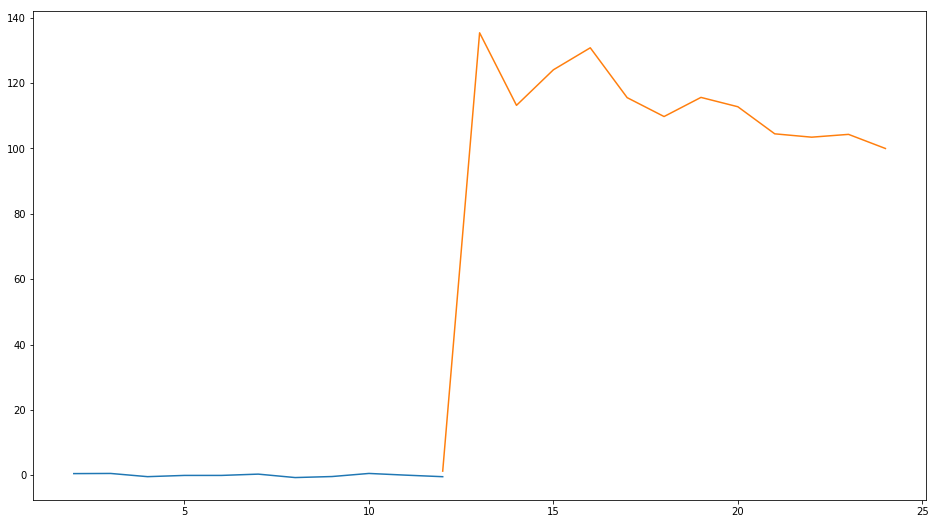

In [180]:
Final_predict = np.exp(predicts)


Final_predict
plt.plot(tsdf)
plt.plot(Final_predict)

In [130]:
Final_predict

12      1.273301
13    135.368576
14    113.173531
15    124.047176
16    130.779695
17    115.527550
18    109.753866
19    115.605488
20    112.745601
21    104.461135
22    103.435531
23    104.295702
24     99.975986
dtype: float64

In [ ]:
###Thus forecasted the employee absent data for 2011.
###Thank you